In [18]:
# import zipfile as zf
# files = zf.ZipFile("degrees.zip", 'r')
# files.extractall('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\Degrees')
# files.close()


gname='B15002'

path=%pwd

path

'C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\Degrees'

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_files = os.listdir(path)


In [20]:
#set up labels for race/ethnicity, and years

ethnicityLabels={'White alone':'A', "Black or African-American alone":'B', "American Indian or Alaska Native alone":'C', 
           "Asian alone":'D', 'Native Hawaiian and other Pacific Islander alone':'E', 'Some other race': 'F', 'Two or more races': 'G', 'White alone, not Hispanic or Latino':'H', 'Hispanic or Latino':'I' }
ShortenedLabels={'White alone':'White', "Black or African-American alone":'Black', "American Indian or Alaska Native alone":'Native American', 
           "Asian alone":'Asian', 'Native Hawaiian and other Pacific Islander alone':'Pacific Islander', 'Some other race': 'Other', 'Two or more races': 'Two ore more races','White alone, not Hispanic or Latino':'White, not Hispanic or Latino', 'Hispanic or Latino':'Hispanic or Latino' }
years=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


#read data files; each race/ethnicity as one key in the dictionary

#extract file names
data_files_DATA_byrace=dict()
data_files_LEGEND_byrace=dict()

ethnicityLabels.keys()
for label in ethnicityLabels:
    labelLong=gname+ethnicityLabels[label]+'_'
    forLabel_DATA=[f for f in os.listdir('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\Degrees') if labelLong in f and 'DATA' in f]
    forLabel_LEGEND=[f for f in os.listdir('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\Degrees') if labelLong in f and 'LEGEND' in f and 'csv' in f]
    data_files_DATA_byrace[label]=forLabel_DATA
    data_files_LEGEND_byrace[label]=forLabel_LEGEND

    
#actual dataframes
    
data_byrace=dict()
legend_byrace=dict()
for label in ethnicityLabels:
    data_byrace[label]=[pd.read_csv(file) for file in  data_files_DATA_byrace[label]]
    legend_byrace[label]=[pd.read_csv(file) for file in data_files_LEGEND_byrace[label]]


In [21]:
data_files_DATA_byrace['Hispanic or Latino']

['acs-acs1-2005-GROUP_B15002I_DATA.csv',
 'acs-acs1-2006-GROUP_B15002I_DATA.csv',
 'acs-acs1-2007-GROUP_B15002I_DATA.csv',
 'acs-acs1-2008-GROUP_B15002I_DATA.csv',
 'acs-acs1-2009-GROUP_B15002I_DATA.csv',
 'acs-acs1-2010-GROUP_B15002I_DATA.csv',
 'acs-acs1-2011-GROUP_B15002I_DATA.csv',
 'acs-acs1-2012-GROUP_B15002I_DATA.csv',
 'acs-acs1-2013-GROUP_B15002I_DATA.csv',
 'acs-acs1-2014-GROUP_B15002I_DATA.csv',
 'acs-acs1-2015-GROUP_B15002I_DATA.csv',
 'acs-acs1-2016-GROUP_B15002I_DATA.csv',
 'acs-acs1-2017-GROUP_B15002I_DATA.csv',
 'acs-acs1-2018-GROUP_B15002I_DATA.csv']

In [22]:
# IMPORTANT: while running a test later, noticed that the variables aren't consistent accross years.See in the next cell.
# Years 2005-2007 have one category for high-school graduates, while years 2008-2018 have two. Combine the two groups in the latter case
# Start cleaning up variables. 

for label in ethnicityLabels:
    for n in range(3, 14):
        data_byrace[label][n][gname+ethnicityLabels[label]+'_005E']=data_byrace[label][n][gname+ethnicityLabels[label]+'_005E']+data_byrace[label][n][gname+ethnicityLabels[label]+'_006E']
        data_byrace[label][n].drop([gname+ethnicityLabels[label]+'_006E'], axis=1, inplace=True)
        data_byrace[label][n][gname+ethnicityLabels[label]+'_014E']=data_byrace[label][n][gname+ethnicityLabels[label]+'_014E']+data_byrace[label][n][gname+ethnicityLabels[label]+'_015E']
        data_byrace[label][n].drop([gname+ethnicityLabels[label]+'_015E'], axis=1, inplace=True)
        for m in range(7, 10):
            data_byrace[label][n].rename(columns = {(gname+ethnicityLabels[label]+'_00'+str(m)+'E'):(gname+ethnicityLabels[label]+'_00'+str(m-1)+'E')}, inplace = True)
        data_byrace[label][n].rename(columns = {(gname+ethnicityLabels[label]+'_010E'):(gname+ethnicityLabels[label]+'_009E')}, inplace = True)    
        for m in range(11, 15):
            data_byrace[label][n].rename(columns = {(gname+ethnicityLabels[label]+'_0'+str(m)+'E'):(gname+ethnicityLabels[label]+'_0'+str(m-1)+'E')}, inplace = True)
        for m in range(16, 20):
            data_byrace[label][n].rename(columns = {(gname+ethnicityLabels[label]+'_0'+str(m)+'E'):(gname+ethnicityLabels[label]+'_0'+str(m-2)+'E')}, inplace = True)

In [23]:
legend_byrace['Black or African-American alone'][0][0:18] == legend_byrace['Black or African-American alone'][3][0:18]

,VARIABLE,TYPE,LABEL,GROUP
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,False,True
5,True,True,False,True
6,True,True,False,True
7,True,True,False,True
8,True,True,False,True
9,True,True,False,True


In [24]:
#now we put the years together


for label in data_byrace:
    for n in range(len(years)):
        data_byrace[label][n].rename(index={0: years[n]}, inplace=True)            #rename index values to years

for label in data_byrace:
    dataFrames=data_byrace[label].copy()
    dataFrame=dataFrames[0].T.copy()
    for n in range(1, len(years)):
        dataFrame=dataFrame.join(dataFrames[n].T)     #join; transpose to join by variables
    data_byrace[label]=dataFrame.T    
   #to see what each frame looks like, uncomment next line
data_byrace['Black or African-American alone']



,GEO_ID,B15002B_001E,B15002B_001M,B15002B_002E,B15002B_002M,B15002B_003E,B15002B_003M,B15002B_004E,B15002B_004M,B15002B_005E,...,B15002B_013MA,B15002B_014EA,B15002B_014MA,B15002B_015MA,B15002B_015EA,B15002B_016MA,B15002B_016EA,B15002B_017EA,B15002B_017MA,us
2005,0100000US,20517897,22184,8983724,15814,545093,13379,1292805,18952,3141387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2006,0100000US,21877084,24577,9947576,19959,617232,12292,1551570,19675,3643070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2007,0100000US,22171628,29955,10088053,22026,598529,12567,1510016,17339,3713686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2008,0100000US,22610676,31672,10298348,23550,631948,14317,1506459,21590,3535064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2009,0100000US,22975410,28398,10467310,19882,613450,11568,1484950,22860,3631059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010,0100000US,23530646,31791,10745175,22224,598716,12176,1511170,21660,3768338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2011,0100000US,23898097,36819,10930075,26015,590304,11832,1488657,16328,3797525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2012,0100000US,24280587,27333,11132547,20388,564178,11583,1465036,20993,3860920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2013,0100000US,24615101,34944,11287646,24465,562630,12953,1447394,21250,3918615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2014,0100000US,25133184,34295,11527093,24334,522827,13351,1434434,19406,4044988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [25]:
#Now pick the variables that we will work with


variables=['001E', '002E', '003E', '004E','005E', '006E', '007E', '008E','009E', '010E', 
           '011E', '012E','013E', '014E', '015E', '016E', '017E']



#variables=['010E', '011E', '012E','013E', '014E', '015E', '016E', '017E']

                  
                  
file=legend_byrace['Black or African-American alone'][0].copy()
file.set_index('VARIABLE', inplace=True)
file=file.T
cols=list(file.columns)
longNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    #longLabel=file[longName]['LABEL'][17:].replace('!!', ': ')
    #longNamesVariables[suffix]=longLabel
    #if len(longLabel)==0:
    #    longNamesVariables[suffix]='Total'
    longNamesVariables[suffix]=file[longName]['LABEL']


#set up short names to variables, for plotting
shortNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    shortLabel=file[longName]['LABEL'][17:].replace('!!', ': ')
    shortNamesVariables[longNamesVariables[suffix]]=shortLabel
    if len(shortLabel)==0:
        shortNamesVariables[longNamesVariables[suffix]]='All: total'


#to see the labels, uncomment the next 2 lines
# print(longNamesVariables)
# print(shortNamesVariables)


#now setting up variables for each ethnicity/race
#probably overkill, but should let us know if an variables are missing

ethnicityVars=dict()
for label in ethnicityLabels:
    ethnicityVars[label]=[]
    file=legend_byrace[label][0].copy()
    file.set_index('VARIABLE', inplace=True)
    file=file.T
    cols=list(file.columns)
    for suffix in variables:
        for variableName in cols:
            if variableName[-4:]==suffix:
                name=variableName
        ethnicityVars[label].append(name)

#print(ethnicityVars)        
    
for label in ethnicityLabels:
    dataFrame=data_byrace[label].copy()
    dataFrame=dataFrame[ethnicityVars[label]]
    data_byrace[label]=dataFrame


In [26]:
for label in ethnicityLabels:
    cols=list(data_byrace[label].columns)
    for col in cols:
        data_byrace[label].rename(columns={col: shortNamesVariables[longNamesVariables[col[-4:]]]}, inplace=True)
    

In [27]:
data_byrace['Black or African-American alone']

,All: total,Male,Male: Less than 9th grade,"Male: 9th to 12th grade, no diploma",Male: High school graduate (includes equivalency),"Male: Some college, no degree",Male: Associate's degree,Male: Bachelor's degree,Male: Graduate degree,Female,Female: Less than 9th grade,"Female: 9th to 12th grade, no diploma",Female: High school graduate (includes equivalency),"Female: Some college, no degree",Female: Associate's degree,Female: Bachelor's degree,Female: Graduate degree
2005,20517897,8983724,545093,1292805,3141387,1894631,616145,1012824,480839,11534173,629004,1649343,3609740,2680601,910425,1329744,725316
2006,21877084,9947576,617232,1551570,3643070,1964538,638318,1035172,497676,11929508,685609,1644485,3830917,2671493,940566,1408401,748037
2007,22171628,10088053,598529,1510016,3713686,2033224,642946,1079758,509894,12083575,652403,1641918,3899360,2675417,977064,1454689,782724
2008,22610676,10298348,631948,1506459,3535064,2344414,654326,1094250,531887,12312328,689089,1546192,3574906,3139721,1022740,1509835,829845
2009,22975410,10467310,613450,1484950,3631059,2442161,663605,1104074,528011,12508100,655559,1524025,3631686,3278211,1010597,1531439,876583
2010,23530646,10745175,598716,1511170,3768338,2511279,669058,1140082,546532,12785471,645131,1498969,3690282,3340764,1083737,1607631,918957
2011,23898097,10930075,590304,1488657,3797525,2585679,695461,1181757,590692,12968022,619298,1495716,3739088,3390851,1094602,1658857,969610
2012,24280587,11132547,564178,1465036,3860920,2700300,720739,1214189,607185,13148040,617069,1437913,3741098,3470522,1155665,1692628,1033145
2013,24615101,11287646,562630,1447394,3918615,2728520,750176,1243511,636800,13327455,601385,1408640,3729484,3518601,1196938,1774373,1098034
2014,25133184,11527093,522827,1434434,4044988,2766729,777660,1303762,676693,13606091,585906,1387986,3888793,3530890,1242718,1807184,1162614


In [28]:
#Add 'Not Black or African-American' label and frame

ethnicityLabels['Not Black or African-American']=''

data_byrace['Not Black or African-American']= data_byrace['White alone']+data_byrace["American Indian or Alaska Native alone"]+data_byrace['Asian alone']+data_byrace['Native Hawaiian and other Pacific Islander alone']+data_byrace['Some other race']+data_byrace['Two or more races']
data_byrace['Not Black or African-American']

,All: total,Male,Male: Less than 9th grade,"Male: 9th to 12th grade, no diploma",Male: High school graduate (includes equivalency),"Male: Some college, no degree",Male: Associate's degree,Male: Bachelor's degree,Male: Graduate degree,Female,Female: Less than 9th grade,"Female: 9th to 12th grade, no diploma",Female: High school graduate (includes equivalency),"Female: Some college, no degree",Female: Associate's degree,Female: Bachelor's degree,Female: Graduate degree
2005,168432862,81523050,5314134,7469020,23150675,15830567,5483463,14955154,9320037,86909812,5304820,7578110,25955134,17578811,6950021,15238464,8304452
2006,174055740,84412365,5721738,7700077,24670776,15854784,5698056,15266127,9500807,89643375,5718976,7606408,26979191,17694863,7209262,15786487,8648188
2007,175720741,85302105,5662960,7576357,24971292,16005372,5759334,15660931,9665859,90418636,5661426,7369834,27073977,17808299,7325444,16169099,9010557
2008,177419342,86222038,5723441,7320393,23980177,17640271,5806963,15875640,9875153,91197304,5695772,6955471,25942067,19440972,7522450,16523346,9117226
2009,178976973,87014839,5712401,7260666,24264398,17837082,5902048,16070401,9967843,91962134,5659551,6874646,26024528,19530030,7616076,16788453,9468850
2010,180758287,87559670,5586962,7199602,24559028,17912566,5989660,16245727,10066125,93198617,5622143,6800322,26207954,19704559,7810651,17251034,9801954
2011,182573573,88523113,5532480,7079446,24851889,18096521,6157419,16502991,10302367,94050460,5575524,6707880,26264709,19749115,8068693,17571854,10112685
2012,184450911,89497155,5414313,6975061,24897878,18332682,6394174,16924686,10558361,94953756,5476746,6531952,25995765,19896433,8340532,18137581,10574747
2013,186295514,90475434,5470738,6852323,25004171,18409708,6535410,17335275,10867809,95820080,5499615,6425501,26007203,19853332,8523848,18528814,10981767
2014,188592440,91574721,5460037,6795116,25349031,18466626,6660246,17737381,11106284,97017719,5495094,6310634,25966740,20035236,8748907,19015687,11445421


In [29]:
#Tests
label='Not Black or African-American'
data_byrace[label]['Female']-data_byrace[label]['Female: Less than 9th grade']-data_byrace[label]['Female: 9th to 12th grade, no diploma']-data_byrace[label]['Female: High school graduate (includes equivalency)']-data_byrace[label]['Female: Some college, no degree']-data_byrace[label]["Female: Associate's degree"]-data_byrace[label]["Female: Bachelor's degree"]-data_byrace[label]['Female: Graduate degree']

2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object

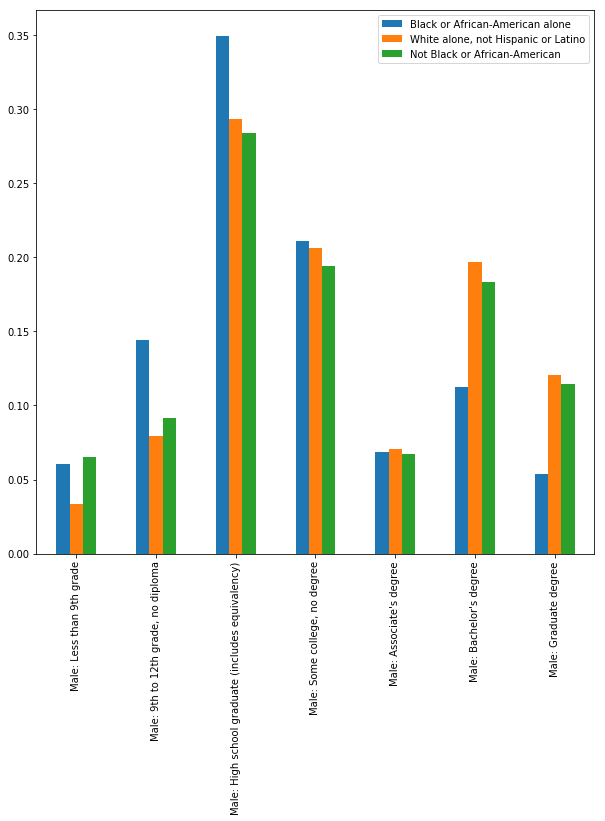

In [30]:
##Histograms for each year

from numpy import *
import math
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pyplot import *

year=2005
newFrame=pd.DataFrame(index=data_byrace['Black or African-American alone'].T.index)
for label in ['Black or African-American alone', 'White alone, not Hispanic or Latino', 'Not Black or African-American']:
    newFrame[label]=(data_byrace[label].T[year]/data_byrace[label].T[year]['Male']).copy()
    
newFrame=newFrame[:][2:9]

newFrame
    
ax = newFrame.plot.bar(rot=90, figsize=(10,10))    


In [31]:
#The long one: moving to excel version

data_byrace_cleaned=dict()


addedLabels=['Male: no high school degree', 'Female: no high-school degree', 
             'Total: no high-school degree', "Male: Bachelor's degree and higher", 
             "Female: Bachelor's degree and higher", "All: Bachelor's degree and higher"]
for label in ethnicityLabels:
    newData=data_byrace[label].iloc[:, [0, 1, 9]].copy()
    newData[addedLabels[0]]=data_byrace[label].iloc[:, 2]+data_byrace[label].iloc[:, 3]
    newData[addedLabels[1]]=data_byrace[label].iloc[:, 10]+data_byrace[label].iloc[:, 11]
    newData[addedLabels[2]]=newData[addedLabels[0]]+newData[addedLabels[1]]
    newData[addedLabels[3]]=data_byrace[label].iloc[:, 7]+data_byrace[label].iloc[:, 8]
    newData[addedLabels[4]]=data_byrace[label].iloc[:, 15]+data_byrace[label].iloc[:, 16]
    newData[addedLabels[5]]=newData[addedLabels[3]]+newData[addedLabels[4]]
    data_byrace_cleaned[label]=newData
    

In [18]:
data_byrace_cleaned['Not Black or African-American']

,All: total,Male,Female,Male: no high school degree,Female: no high-school degree,Total: no high-school degree,Male: Bachelor's degree and higher,Female: Bachelor's degree and higher,All: Bachelor's degree and higher
2005,168432862,81523050,86909812,12783154,12882930,25666084,24275191,23542916,47818107
2006,174055740,84412365,89643375,13421815,13325384,26747199,24766934,24434675,49201609
2007,175720741,85302105,90418636,13239317,13031260,26270577,25326790,25179656,50506446
2008,177419342,86222038,91197304,13043834,12651243,25695077,25750793,25640572,51391365
2009,178976973,87014839,91962134,12973067,12534197,25507264,26038244,26257303,52295547
2010,180758287,87559670,93198617,12786564,12422465,25209029,26311852,27052988,53364840
2011,182573573,88523113,94050460,12611926,12283404,24895330,26805358,27684539,54489897
2012,184450911,89497155,94953756,12389374,12008698,24398072,27483047,28712328,56195375
2013,186295514,90475434,95820080,12323061,11925116,24248177,28203084,29510581,57713665
2014,188592440,91574721,97017719,12255153,11805728,24060881,28843665,30461108,59304773


In [32]:
# The previous dataframes contained too many columns. Now we make the excel version, where we sum all races/ethnicities except for Black
# Again, there are definitely better ways to do this :)

excelVersion=pd.DataFrame(index=data_byrace['Black or African-American alone'].index)
for label in ['Black or African-American alone', 'White alone, not Hispanic or Latino', 'Not Black or African-American']:
    excelVersion[label+': total population 25 years and over']=data_byrace_cleaned[label]['All: total']
    excelVersion[label+': no high-school degree']=data_byrace_cleaned[label]['Total: no high-school degree']
    excelVersion[label+": Bachelor's degree and higher"]=data_byrace_cleaned[label]["All: Bachelor's degree and higher"]
    excelVersion[label+": Female"]=data_byrace_cleaned[label]['Female']
    excelVersion[label+ ': Female, no high-school degree']=data_byrace_cleaned[label]["Female: no high-school degree"]
    excelVersion[label+": Female, Bachelor's degree and higher"]=data_byrace_cleaned[label]["Female: Bachelor's degree and higher"]
    excelVersion[label+', fraction: no high-school degree']=excelVersion[label+': no high-school degree']/excelVersion[label+': total population 25 years and over']
    excelVersion[label+", fraction: Bachelor's degree and higher"]=excelVersion[label+": Bachelor's degree and higher"]/excelVersion[label+': total population 25 years and over']
    excelVersion[label+", fraction: Female, no high-school degree"]=excelVersion[label+': Female, no high-school degree']/excelVersion[label+': total population 25 years and over']
    excelVersion[label+", fraction: Female, Bachelor's degree and higher"]=excelVersion[label+": Female, Bachelor's degree and higher"]/excelVersion[label+': total population 25 years and over']



In [34]:

excelVersion.to_excel('EducationalAttainmentAge25AndOverTrends.xlsx') 
excelVersion


,Black or African-American alone: total population 25 years and over,Black or African-American alone: no high-school degree,Black or African-American alone: Bachelor's degree and higher,Black or African-American alone: Female,"Black or African-American alone: Female, no high-school degree","Black or African-American alone: Female, Bachelor's degree and higher","Black or African-American alone, fraction: no high-school degree","Black or African-American alone, fraction: Bachelor's degree and higher","Black or African-American alone, fraction: Female, no high-school degree","Black or African-American alone, fraction: Female, Bachelor's degree and higher",...,Not Black or African-American: total population 25 years and over,Not Black or African-American: no high-school degree,Not Black or African-American: Bachelor's degree and higher,Not Black or African-American: Female,"Not Black or African-American: Female, no high-school degree","Not Black or African-American: Female, Bachelor's degree and higher","Not Black or African-American, fraction: no high-school degree","Not Black or African-American, fraction: Bachelor's degree and higher","Not Black or African-American, fraction: Female, no high-school degree","Not Black or African-American, fraction: Female, Bachelor's degree and higher"
2005,20517897,4116245,3548723,11534173,2278347,2055060,0.200617,0.172957,0.111042,0.100159,...,168432862,25666084,47818107,86909812,12882930,23542916,0.152382,0.2839,0.076487,0.139776
2006,21877084,4498896,3689286,11929508,2330094,2156438,0.205644,0.168637,0.106508,0.0985706,...,174055740,26747199,49201609,89643375,13325384,24434675,0.15367,0.282677,0.0765581,0.140384
2007,22171628,4402866,3827065,12083575,2294321,2237413,0.198581,0.172611,0.10348,0.100913,...,175720741,26270577,50506446,90418636,13031260,25179656,0.149502,0.287424,0.0741589,0.143294
2008,22610676,4373688,3965817,12312328,2235281,2339680,0.193435,0.175396,0.0988595,0.103477,...,177419342,25695077,51391365,91197304,12651243,25640572,0.144827,0.28966,0.071307,0.14452
2009,22975410,4277984,4040107,12508100,2179584,2408022,0.186198,0.175845,0.0948659,0.104809,...,178976973,25507264,52295547,91962134,12534197,26257303,0.142517,0.292191,0.0700325,0.146708
2010,23530646,4253986,4213202,12785471,2144100,2526588,0.180785,0.179052,0.0911195,0.107374,...,180758287,25209029,53364840,93198617,12422465,27052988,0.139463,0.295228,0.0687242,0.149664
2011,23898097,4193975,4400916,12968022,2115014,2628467,0.175494,0.184153,0.0885014,0.109986,...,182573573,24895330,54489897,94050460,12283404,27684539,0.136358,0.298454,0.0672792,0.151635
2012,24280587,4084196,4547147,13148040,2054982,2725773,0.168208,0.187275,0.0846348,0.112261,...,184450911,24398072,56195375,94953756,12008698,28712328,0.132274,0.304663,0.0651051,0.155664
2013,24615101,4020049,4752718,13327455,2010025,2872407,0.163316,0.193081,0.0816582,0.116693,...,186295514,24248177,57713665,95820080,11925116,29510581,0.13016,0.309796,0.0640118,0.158407
2014,25133184,3931153,4950253,13606091,1973892,2969798,0.156413,0.196961,0.0785373,0.118162,...,188592440,24060881,59304773,97017719,11805728,30461108,0.127581,0.31446,0.0625992,0.161518


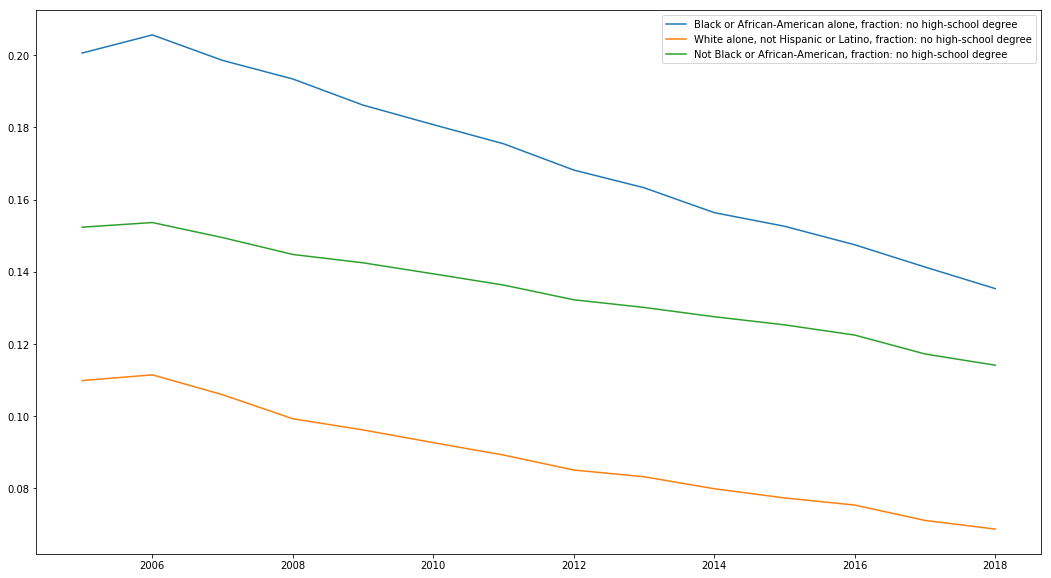

In [35]:
#More plotting

addedLabelsFC=["Black or African-American alone, fraction: Female, Bachelor's degree and higher","White alone, not Hispanic or Latino, fraction: Female, Bachelor's degree and higher","Not Black or African-American, fraction: Female, Bachelor's degree and higher"]


addedLabelsC=["Black or African-American alone, fraction: Bachelor's degree and higher","White alone, not Hispanic or Latino, fraction: Bachelor's degree and higher","Not Black or African-American, fraction: Bachelor's degree and higher"]



addedLabelsFHS=["Black or African-American alone, fraction: Female, no high-school degree","White alone, not Hispanic or Latino, fraction: Female, no high-school degree","Not Black or African-American, fraction: Female, no high-school degree"]



addedLabelsHS=["Black or African-American alone, fraction: no high-school degree","White alone, not Hispanic or Latino, fraction: no high-school degree","Not Black or African-American, fraction: no high-school degree"]






frame=excelVersion
fig, ax = subplots()
for item in addedLabelsHS:
    frame[item].plot(figsize=(18,10), ax=ax)
    
ax.legend(addedLabelsHS)